In [1]:
import twitter
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
api = twitter.Api(consumer_key="vSsCY8ZdyOKqI2nBVpLElBKDD",
                  consumer_secret="xHWGtoCllCtc7lb5GkCAhJVU4q7TGN8TBtZZOEFqK1Rez8LQ1t",
                  access_token_key="806043476831809537-F2GoVNl8ngMXD0z0fdsvCSJXxolZhiY",
                  access_token_secret="aupIcZVfqSx9xyWYaa2Kyu7PJmfnpdah8G0Urgjwtz1U1"                  
                  )
api.sleep_on_rate_limit = True

In [3]:
def getUserFromName(name, api):
    user_list = api.GetUsersSearch(term=name, page=1, count=1)
    if user_list:
        user = user_list[0]
        if user.verified:
            return user
    return None

In [5]:
getUserFromName('Lionel Messi', api)

User(ID=2917808716, ScreenName=fundacionmessi)

In [4]:
queries = ["Narendra Modi", "donald trump", "Boris Johnson"]

In [6]:
V = []
for i in range(len(queries)):
    user = getUserFromName(queries[i], api)
    if user:
        row = [repr(user.id), user.name, user.screen_name] 
    V.append(row)

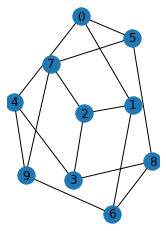

In [20]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True)
plt.show()

In [23]:
list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]

In [10]:
# api.GetSearch(raw_query="screen_name=fundacionmessi")
len(api.GetFriends(2917808716))

100

In [12]:
api.GetFriends(2917808716)

[User(ID=95257207, ScreenName=PaolaRojas),
 User(ID=308699799, ScreenName=mariroussv),
 User(ID=1169466104, ScreenName=FundacionMGAS),
 User(ID=3072579299, ScreenName=acellfederacio),
 User(ID=74393294, ScreenName=JCFoundation),
 User(ID=179990537, ScreenName=lacapital),
 User(ID=186324385, ScreenName=PA7i7O),
 User(ID=366158266, ScreenName=JAchievement),
 User(ID=385958092, ScreenName=lichirosental),
 User(ID=107416993, ScreenName=matba_rofex),
 User(ID=2432016882, ScreenName=FundacionRos),
 User(ID=158110011, ScreenName=sorluciacaram),
 User(ID=155648349, ScreenName=FUNDACIONPUPI),
 User(ID=155959584, ScreenName=FundacioFCB),
 User(ID=726924583, ScreenName=TuliArellano9),
 User(ID=215939224, ScreenName=VHIR_),
 User(ID=1305983948, ScreenName=MSFTArgentina),
 User(ID=155492898, ScreenName=FundacionCruyff),
 User(ID=129993628, ScreenName=fedenrusso),
 User(ID=500110866, ScreenName=DamianDelorenzi),
 User(ID=71241787, ScreenName=fundlanacion),
 User(ID=162820573, ScreenName=danielevila)